In [1]:
import os 
import datetime

# 打印时间
def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print('\n' + "========" * 8 + f'{nowtime}')

os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'


In [2]:
printbar()


================================================================2022-07-03 23:02:58


## 结构化数据建模


### 准备数据

使用的数据集是titanic数据集,根据乘客的信息预测它们在轮船撞到冰山后是否能生存

题目中使用的titanic数据集是高度结构化的数据(二维表),一般使用pandas的DataFrame进行预处理

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

# 读取训练集和测试集样本
train_raw = pd.read_csv('./data/titanic/train.csv')
test_raw = pd.read_csv('./data/titanic/test.csv')
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S


借助于pandas的数据可视化功能进行简单的探索性数据分析



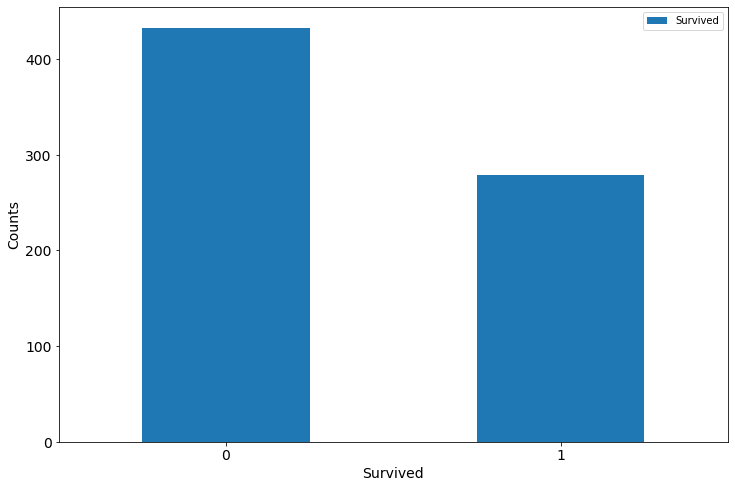

In [5]:
# 查看label的分布情况
"""
这里的label是是否幸存,为1表示幸存,为0表示没有幸存
"""

%matplotlib inline
%config InlineBacked.figure_format = 'png'

ax = train_raw['Survived'].value_counts().plot(kind='bar', figsize =(12,8), fontsize=14, rot=0)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xlabel('Survived', fontsize=14)
plt.legend()
plt.show()

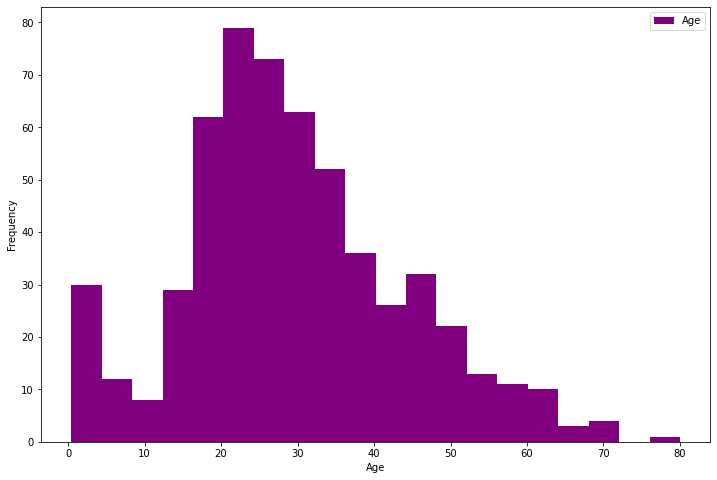

In [8]:
# 查看年龄分布情况
ax = train_raw['Age'].plot(kind='hist', bins=20, color='purple',
                            figsize=(12,8))
ax.set_ylabel('Frequency')
ax.set_xlabel('Age')
plt.legend(loc='best')
plt.show()

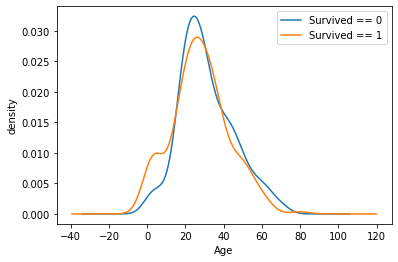

In [10]:
# 年龄和label的相关性?
ax = train_raw.query('Survived == 0')['Age'].plot(kind='density')
train_raw.query('Survived == 1')['Age'].plot(kind='density')
ax.legend(['Survived == 0', 'Survived == 1'])
ax.set_ylabel('density')
ax.set_xlabel('Age')
plt.show()

### 数据预处理


In [ ]:
def preprocessing(data):
    result = pd.DataFrame()

    # pclass
    Pclass = pd.get_dummies(data['Pclass'])
    Pclass.columns = ['Pclass_' + str(x) for x in Pclass.columns]
    
    result = pd.concat([result, Pclass], axis=1)

    # Sex
    Sex = pd.get_dummies(data['Sex'])
    result = pd.concat([result,Sex], axis=1)

    # Age
    result['Age'] = data['Age'].fillna(0)
    result['Age_null'] = pd.isna(data['Age']).astype('int32')

    
